<a href="https://colab.research.google.com/github/haticebaydemir/LDAandEDA/blob/main/LDAandEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### LDA - Gizli Dirichlet Ayrımı (Latent Dirichlet Allocation)
En popüler konu modelleme algoritmalarından biridir.
## Exploratory Data Analysis (EDA)

# Gerekli Kütüphaneler

In [ ]:
!pip install pyLDAvis
!pip install pyLDAvis gensim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import re
import string
import nltk
from nltk.corpus import stopwords

import gensim
import pyLDAvis.gensim # for visualization
from gensim.models import CoherenceModel

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 23.5 MB/s eta 0:00:00


pyLDAvis: LDA (Latent Dirichlet Allocation) modelinin görselleştirilmesi için kullanılır.

gensim: Doğal dil işleme ve metin madenciliği için kullanılan bir kütüphanedir ve genellikle konu modelleme için kullanılır.

numpy: Matematiksel hesaplamalar için kullanılır.

pandas: Veri analizi ve manipülasyonu için kullanılır.

matplotlib.pyplot: Grafikler ve görselleştirmeler yapmak için kullanılır.
re: Düzenli ifadelerle metin işleme için kullanılır.

string: Metin işlemede kullanılan çeşitli araçlar sağlar.

nltk: Doğal dil işleme için kullanılır ve stopwords (yaygın kullanılan kelimeler) listesini içerir.

gensim: Metin madenciliği ve konu modelleme için kullanılır.

pyLDAvis.gensim: Gensim ile oluşturulan LDA modelini görselleştirmek için kullanılır.
CoherenceModel: LDA modelinin kalitesini değerlendirmek için kullanılır.

# Veri Yükleme

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Mounted at /content/drive


In [ ]:
# Dosya yolu:
file_path = '/content/drive/MyDrive/dataset/turkish_news.zip'
df = pd.read_csv(file_path)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import zipfile
import io
from google.colab import drive

# Google Drive'ı bağlayın
drive.mount('/content/drive')

# ZIP dosyasının yolu
zip_file_path = '/content/drive/MyDrive/dataset/turkish_news.zip'

# ZIP dosyasını açın ve CSV dosyasını Pandas DataFrame'e yükleyin
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # ZIP dosyasındaki CSV dosyalarının isimlerini al
    csv_file_name = [name for name in zip_ref.namelist() if name.endswith('.csv')][0]

    # CSV dosyasını bellekten okuma
    with zip_ref.open(csv_file_name) as my_file:
        df = pd.read_csv(my_file)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Veri serindeki ilk üç satır
df.head(3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,main_image,published,site,text,title,url
0,72337,"""http://www.diken.com.tr/wp-content/uploads/20...","""2019-03-04T13:33:00.000+02:00""","""diken.com.tr""","""Yatırım bankası: Dolar/TL üçüncü çeyrekte 8.9...","""Yatırım bankası: Dolar/TL üçüncü çeyrekte 8.9...","""http://www.diken.com.tr/yatirim-bankasi-dolar..."
1,72338,"""http://www.diken.com.tr/wp-content/uploads/20...","""2019-03-04T13:21:00.000+02:00""","""diken.com.tr""","""PİAR Araştırma: Adana ve Antalya’da ‘millet i...","""PİAR Araştırma: Adana ve Antalya’da ‘millet i...","""http://www.diken.com.tr/piar-arastirma-adana-..."
2,72339,"""http://www.diken.com.tr/wp-content/uploads/20...","""2019-03-04T12:20:00.000+02:00""","""diken.com.tr""","""Renaissance Capital: Merkez Bankası bu hafta ...","""Renaissance Capital: Merkez Bankası bu hafta ...","""http://www.diken.com.tr/renaissance-capital-m..."


In [ ]:
df['text'] = df['text'].astype(str)
#Bu satır, bir pandas DataFrame'deki text sütunundaki tüm verileri string (metin) veri türüne dönüştürmek için kullanılır.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
news_df = df[['text']]
news_df.head()
#Bu satır, pandas DataFrame'inden sadece belirli bir sütunu seçmek ve yeni bir DataFrame oluşturmak için kullanılır.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,text
0,"""Yatırım bankası: Dolar/TL üçüncü çeyrekte 8.9..."
1,"""PİAR Araştırma: Adana ve Antalya’da ‘millet i..."
2,"""Renaissance Capital: Merkez Bankası bu hafta ..."
3,"""Ağrı’daki İYİ Partililerin istifa gerekçesi: ..."
4,"""Otomobil pazarı iki ayda yarı yarıya eridi 04..."


Neler Yapacağız?

Küçük Harfe Çevirme: Metinleri küçük harfe dönüştürür.

Noktalama İşaretlerini Kaldırma: Metin içindeki tüm noktalama işaretlerini temizler.

Sayıları Kaldırma: Metindeki sayıları kaldırır.

Stopwords'leri Kaldırma: Yaygın kullanılan ve analizde katkısı olmayan kelimeleri temizler.

Gereksiz Kelimeleri Kaldırma: Özelleştirilmiş gereksiz kelimeleri çıkarır.

In [ ]:
import nltk

# 'stopwords' verisini indirin
nltk.download('stopwords')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import string
from nltk.corpus import stopwords

# Noktalama işaretleri setini oluşturun
punctuation_set = set(string.punctuation)

# Türkçe stopwords'leri yükleyin ve genişletin
stopwords_set = set(stopwords.words('turkish'))
stopwords_set.update(['bir', 'kadar', 'sonra'])

# Örnek metin
text = "Bu bir örnek metindir. Şu an 2024 yılındayız."

# Metni temizleme işlevi
def clean_dataset(text):
    # Küçük harfe çevir
    text = text.lower()

    # Noktalama işaretlerini kaldır
    text = ''.join([char for char in text if char not in punctuation_set])

    # Sayıları kaldır
    text = ''.join([char for char in text if not char.isdigit()])

    # Stopwords'leri kaldır
    text = ' '.join(word for word in text.split() if word not in stopwords_set)

    return text

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
news_df['text'] = news_df['text'].apply(lambda x: clean_dataset(x))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-15-1e237955aa7d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_df['text'] = news_df['text'].apply(lambda x: clean_dataset(x))


In [ ]:
news_df['cleaned_text'] = news_df.iloc[5].text

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-16-239f8d955830>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_df['cleaned_text'] = news_df.iloc[5].text


In [ ]:
news_df['cleaned_text'].iloc[5]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'şubat ayında ihracat yüzde arttı ithalat yüzde azaldı nticaret bakanı ruhsar pekcan şubat ayında ihracatın yüzde artışla milyar milyon dolar ithalatın yüzde azalışla milyar milyon dolar olarak gerçekleştiğini açıkladı fotoğraf reutersnbakan pekcan şunları söyledi “ eskiden kullandığımız özel ticaret sistemine göre şubat ayında ihracatımız yüzde artışla milyar milyon dolar olarak gerçekleşmiştir öts’ye göre ithalatımız şubat ayında yüzde düşüşle milyar milyon dolar seviyesinde gerçekleşmiştir ” reklam'

In [ ]:
news_df['cleaned_text_token'] = news_df['cleaned_text'].apply(lambda x: x.split())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-18-810a655e9a5e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_df['cleaned_text_token'] = news_df['cleaned_text'].apply(lambda x: x.split())


In [ ]:
news_df.drop(['text'], axis=1, inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-19-54ebb617f88c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_df.drop(['text'], axis=1, inplace=True)


In [ ]:
news_df.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,cleaned_text,cleaned_text_token
0,şubat ayında ihracat yüzde arttı ithalat yüzde...,"[şubat, ayında, ihracat, yüzde, arttı, ithalat..."
1,şubat ayında ihracat yüzde arttı ithalat yüzde...,"[şubat, ayında, ihracat, yüzde, arttı, ithalat..."
2,şubat ayında ihracat yüzde arttı ithalat yüzde...,"[şubat, ayında, ihracat, yüzde, arttı, ithalat..."
3,şubat ayında ihracat yüzde arttı ithalat yüzde...,"[şubat, ayında, ihracat, yüzde, arttı, ithalat..."
4,şubat ayında ihracat yüzde arttı ithalat yüzde...,"[şubat, ayında, ihracat, yüzde, arttı, ithalat..."


# LDA MODEL TRAINING

In [ ]:
tokenized_text = news_df['cleaned_text_token']
word_list = gensim.corpora.Dictionary(tokenized_text)

# Bu kod parçaları, news_df DataFrame'indeki her bir metni kelimelere ayırıp, bu kelimeleri bir sözlükte toplar. Bu sözlük, her benzersiz kelimeye bir id atar ve bu id'ler ile kelimeler arasında bir eşleşme sağlar.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# vectorized terms
document_term_matrix = [word_list.doc2bow(term) for term in tokenized_text]
# Bu kod parçası, metin verilerini sayısal bir formata dönüştürür.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
lda_model = gensim.models.ldamodel.LdaModel(
                                            corpus= document_term_matrix,
                                            id2word= word_list,
                                            num_topics = 15,
                                            passes = 10
                                           )

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Bu kod parçası, LDA modelini oluşturur ve eğitir. LDA, belgeler içinde gizli konuları bulmak için kullanılır ve şu işlemleri yapar:

Konu Modelleme (Topic Modeling): LDA, belgelerdeki temaları veya konuları keşfetmek için kullanılır. Belirli bir sayıda konu belirleyerek, model bu konuları belgelerdeki kelimeler ile ilişkilendirir.

Konu Dağılımı: Her bir belge, belirli konuların bir kombinasyonu olarak temsil edilir. Her bir konu, belirli kelimelerin bir dağılımıdır.

In [ ]:
# Most repeated words in created topics
topics = lda_model.print_topics(num_words=7)

for topic in topics:
    print(topic)

(0, '0.092*"yüzde" + 0.062*"milyar" + 0.062*"şubat" + 0.062*"ayında" + 0.062*"milyon" + 0.062*"dolar" + 0.031*"pekcan"')
(1, '0.025*"reklam" + 0.025*"pekcan" + 0.025*"ruhsar" + 0.025*"reutersnbakan" + 0.025*"sistemine" + 0.025*"olarak" + 0.025*"söyledi"')
(2, '0.092*"yüzde" + 0.062*"şubat" + 0.062*"milyon" + 0.062*"ayında" + 0.062*"milyar" + 0.062*"dolar" + 0.031*"olarak"')
(3, '0.092*"yüzde" + 0.062*"milyon" + 0.062*"şubat" + 0.062*"ayında" + 0.062*"dolar" + 0.062*"milyar" + 0.031*"artışla"')
(4, '0.092*"yüzde" + 0.062*"dolar" + 0.062*"şubat" + 0.062*"ayında" + 0.062*"milyar" + 0.062*"milyon" + 0.031*"gerçekleşmiştir"')
(5, '0.025*"reklam" + 0.025*"pekcan" + 0.025*"ruhsar" + 0.025*"reutersnbakan" + 0.025*"sistemine" + 0.025*"olarak" + 0.025*"söyledi"')
(6, '0.025*"reklam" + 0.025*"pekcan" + 0.025*"ruhsar" + 0.025*"reutersnbakan" + 0.025*"sistemine" + 0.025*"olarak" + 0.025*"söyledi"')
(7, '0.025*"reklam" + 0.025*"pekcan" + 0.025*"ruhsar" + 0.025*"reutersnbakan" + 0.025*"sistemine" + 0

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Bu kod, LDA modelinde belirlenen konuların içeriğini anlamaya yardımcı olur. Belirli bir sayıda kelime (bu örnekte 7) kullanarak her konunun içeriğini gösterir. Bu, konuların ne hakkında olduğunu anlamak için faydalıdır.

# MODEL VISUALIZATION

In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, document_term_matrix, dictionary=lda_model.id2word, mds='mmds')
pyLDAvis.display(vis)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


Bu kod parçası, LDA modelinizin görselleştirilmiş bir temsilini sağlar. LDA modelindeki konuları daha iyi anlamak ve analiz etmek için kullanılır. Görselleştirme, konuların ve kelimelerin nasıl ilişkili olduğunu, hangi kelimelerin hangi konulara ait olduğunu ve konular arasında nasıl bir ayrım olduğunu görmenizi sağlar.

# Choosing best topic by Coherence Score

In [ ]:
topic_number_range_list = range(9,30,3)

coherence_score_list = list()
topic_number_list = list()

for topic_number in topic_number_range_list:
    lda_model = gensim.models.ldamodel.LdaModel(
                                                corpus= document_term_matrix,
                                                id2word= word_list,
                                                num_topics = topic_number,
                                                passes = 10
                                                )

    coherence_model_lda = CoherenceModel(
                                        model = lda_model,
                                        texts = tokenized_text,
                                        dictionary = word_list,
                                        coherence='c_v'
                                        )

    temp_coherence_score_lda = coherence_model_lda.get_coherence()
    coherence_score_list.append(temp_coherence_score_lda)
    topic_number_list.append(topic_number)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Ne İşe Yarar?

Bu kod, LDA modelinizin çeşitli konu (topic) sayıları için koherans (coherence) puanlarını hesaplar. Koherans, konuların ne kadar anlamlı olduğunu ve kelimelerin konu içinde ne kadar tutarlı olduğunu ölçen bir metriktir. Koherans puanları, konu modellemesi için en iyi parametre ayarlarını belirlemek için kullanılır.


Ne Zaman Kullanılır?

Model Seçimi: Farklı konu sayıları için koherans puanlarını karşılaştırarak, hangi konu sayısının en iyi performansı gösterdiğini belirleyebilirsiniz. Genellikle, yüksek koherans puanı daha iyi anlamlı konuları ifade eder.

Model Değerlendirme: LDA modelinin doğruluğunu ve konuların anlamlılığını değerlendirmek için kullanılır.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


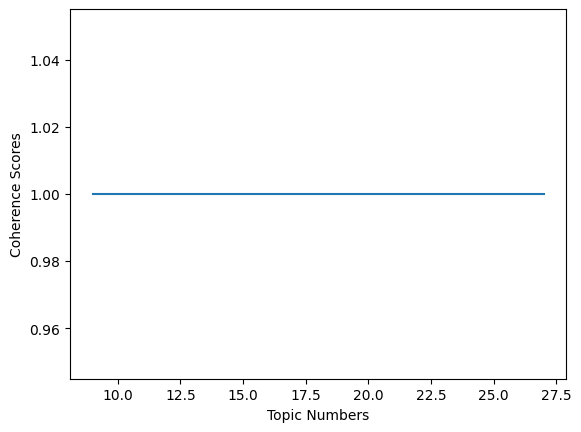

In [ ]:
plt.plot(topic_number_list, coherence_score_list, "-")
plt.xlabel("Topic Numbers")
plt.ylabel("Coherence Scores")

plt.show()

Ne İşe Yarar?

Bu kod parçası, farklı konu sayıları için koherans puanlarını görsel olarak analiz etmenizi sağlar. Grafikte:

X ekseninde: Farklı konu sayıları (örneğin, 9, 12, 15, ...).
Y ekseninde: Bu konu sayıları için hesaplanan koherans puanları.

Ne İçin Kullanılır?

Model Seçimi: Koherans puanları ile konu sayıları arasındaki ilişkiyi görselleştirerek, hangi konu sayısının en iyi sonuçları verdiğini belirlemenize yardımcı olur. Genellikle, koherans puanı en yüksek olan konu sayısı en anlamlı ve etkili sonuçları sağlar.

Model Performansı: Modelin performansını değerlendirmek için, konu sayılarının koherans puanlarına olan etkisini görselleştirir.

In [ ]:
topics = lda_model.print_topics(num_words=7)
topics = sorted(topics, key = lambda x: x[0])

for topic in topics:
    print(topic)

(1, '0.092*"yüzde" + 0.062*"şubat" + 0.062*"milyar" + 0.062*"dolar" + 0.062*"milyon" + 0.062*"ayında" + 0.031*"göre"')
(4, '0.092*"yüzde" + 0.062*"dolar" + 0.062*"milyon" + 0.062*"ayında" + 0.062*"şubat" + 0.062*"milyar" + 0.031*"pekcan"')
(5, '0.092*"yüzde" + 0.062*"dolar" + 0.062*"ayında" + 0.062*"milyar" + 0.062*"milyon" + 0.062*"şubat" + 0.031*"pekcan"')
(6, '0.092*"yüzde" + 0.062*"dolar" + 0.062*"ayında" + 0.062*"milyar" + 0.062*"milyon" + 0.062*"şubat" + 0.031*"pekcan"')
(7, '0.092*"yüzde" + 0.062*"dolar" + 0.062*"milyon" + 0.062*"ayında" + 0.062*"şubat" + 0.062*"milyar" + 0.031*"pekcan"')
(8, '0.092*"yüzde" + 0.062*"dolar" + 0.062*"milyon" + 0.062*"ayında" + 0.062*"şubat" + 0.062*"milyar" + 0.031*"pekcan"')
(9, '0.092*"yüzde" + 0.062*"dolar" + 0.062*"ayında" + 0.062*"milyar" + 0.062*"milyon" + 0.062*"şubat" + 0.031*"pekcan"')
(10, '0.092*"yüzde" + 0.062*"şubat" + 0.062*"milyar" + 0.062*"dolar" + 0.062*"milyon" + 0.062*"ayında" + 0.031*"pekcan"')
(11, '0.092*"yüzde" + 0.062*"dola

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Ne İşe Yarar?

Bu kod parçası, LDA modelinizdeki konuları ve bu konuların içindeki en önemli kelimeleri düzenli ve anlaşılır bir şekilde ekrana yazdırır Özellikle:

Konu Numarası: Her bir konunun numarasını belirtir.

Anahtar Kelimeler: Her konunun içindeki en önemli kelimeleri listeler.

Ne İçin Kullanılır?

Konu Analizi: LDA modelinizdeki konuların içeriklerini anlamak için kullanılır. Her konunun anahtar kelimeleri, o konunun ne hakkında olduğunu ve hangi kelimelerin o konuyla ilişkili olduğunu belirlemenize yardımcı olur.

Model Yorumlama: Konuların sıralanmış bir listesini görsel olarak inceleyerek, modelinizin sağladığı konuları yorumlamayı kolaylaştırır.

In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, document_term_matrix, dictionary=lda_model.id2word, mds='mmds')
pyLDAvis.display(vis)
#Bu kod, LDA modelinizin konularını ve bu konular arasındaki ilişkileri görselleştirmenizi sağlar. PyLDAvis, LDA modelinin sonuçlarını daha iyi anlamak ve analiz etmek için kullanılır.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
